# **Market Basket Analysis** - Retail Store

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
data = pd.read_csv("RetailPurchase_Data.csv", encoding="utf-8", sep=None)
data.columns = ['InvoiceNo', 'ItemDescription', 'Quantity', 'Date', 'Price', 'CustomerID', 'Country']
data.info()

<ipython-input-3-b0fe441fd3cc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("RetailPurchase_Data.csv", encoding="utf-8", sep=None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        522064 non-null  object 
 1   ItemDescription  520609 non-null  object 
 2   Quantity         522064 non-null  int64  
 3   Date             522064 non-null  object 
 4   Price            522064 non-null  object 
 5   CustomerID       388023 non-null  float64
 6   Country          522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [4]:
data.head()

,InvoiceNo,ItemDescription,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


## **Data Cleaning**

In [5]:
data.isna().sum()

,0
InvoiceNo,0
ItemDescription,1455
Quantity,0
Date,0
Price,0
CustomerID,134041
Country,0


#### Column - Date

In [6]:
#converting 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y %H:%M', errors='coerce')

#### Column - Price

In [7]:
#converting 'Price' to numeric format (replace commas with dots)
data['Price'] = data['Price'].astype(str).str.replace(',', '.').astype(float)

In [8]:
data[(data['Price']==0) | (data['Price']<0)].sample(20)

,InvoiceNo,ItemDescription,Quantity,Date,Price,CustomerID,Country
469523,577789,rusty throw away,-280,2011-11-21 16:28:00,0.0,NaN,United Kingdom
171721,552187,mailout,100,2011-05-06 13:59:00,0.0,NaN,United Kingdom
41263,539998,NaN,2,2011-01-04 10:16:00,0.0,NaN,United Kingdom
119506,546933,CERAMIC STRAWBERRY MONEY BOX,2,2011-03-18 11:02:00,0.0,NaN,United Kingdom
412294,573505,check,-22,2011-10-31 12:09:00,0.0,NaN,United Kingdom
391902,571915,check,-32,2011-10-19 15:34:00,0.0,NaN,United Kingdom
428075,574822,damages wax,-1284,2011-11-07 10:38:00,0.0,NaN,United Kingdom
125462,547402,NaN,12,2011-03-22 17:04:00,0.0,NaN,United Kingdom
113147,546375,NaN,48,2011-03-11 12:07:00,0.0,NaN,United Kingdom
140074,548886,NaN,-6,2011-04-04 15:23:00,0.0,NaN,United Kingdom


In [9]:
#eliminating rows with 0 Price due to ambiguous entries in the Item Description column
index = data[(data['Price']==0) | (data['Price']<0)].index
data.drop(index=index, inplace=True)

#### Column - InvoiceNo

In [10]:
#correcting the datatype of InvoiceNo column & removing the non-digit rows due to poor quality data in the corresponding rows
data[data["InvoiceNo"].str.isdigit() == False]

,InvoiceNo,ItemDescription,Quantity,Date,Price,CustomerID,Country
288772,A563185,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [11]:
index = data[data["InvoiceNo"].str.isdigit() == False].index
data.drop(index=index, inplace=True)

In [12]:
data['InvoiceNo'] = data['InvoiceNo'].astype(int)

#### Column - Country

In [13]:
data.Country.value_counts(normalize=True)

,proportion
Country,
United Kingdom,0.933735
Germany,0.017400
France,0.016181
Spain,0.004781
Netherlands,0.004540
Belgium,0.003909
Switzerland,0.003784
Portugal,0.002889
Australia,0.002275


In [14]:
#only retaining data from the customer of UK since it contains more than 93% of the data and to not blend the differnt behavioural patterns of consumers from differebt regions
data = data[data['Country'] == 'United Kingdom'].reset_index()

#### Column - Customer ID

In [15]:
data[data['CustomerID'].isna()]

,index,InvoiceNo,ItemDescription,Quantity,Date,Price,CustomerID,Country
1285,1410,536544,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1286,1411,536544,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1287,1412,536544,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1288,1413,536544,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1289,1414,536544,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
484832,521695,581498,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
484833,521696,581498,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
484834,521697,581498,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
484835,521698,581498,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [16]:
#dropping the CustomerID column since it has a high percentage of nulls and will not be used in our analysis
data.drop(columns='CustomerID', inplace=True)

#### Column - ItemDescription & Quantity

In [17]:
data[data['ItemDescription'].isna()]

,index,InvoiceNo,ItemDescription,Quantity,Date,Price,Country


In [18]:
data[data['Quantity']<1]

,index,InvoiceNo,ItemDescription,Quantity,Date,Price,Country


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485122 entries, 0 to 485121
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   index            485122 non-null  int64         
 1   InvoiceNo        485122 non-null  int64         
 2   ItemDescription  485122 non-null  object        
 3   Quantity         485122 non-null  int64         
 4   Date             485122 non-null  datetime64[ns]
 5   Price            485122 non-null  float64       
 6   Country          485122 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 25.9+ MB


## **Exploratory Data Analysis**

<ipython-input-20-a02f88eb35d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_items.index, x=top_items.values, palette='coolwarm')


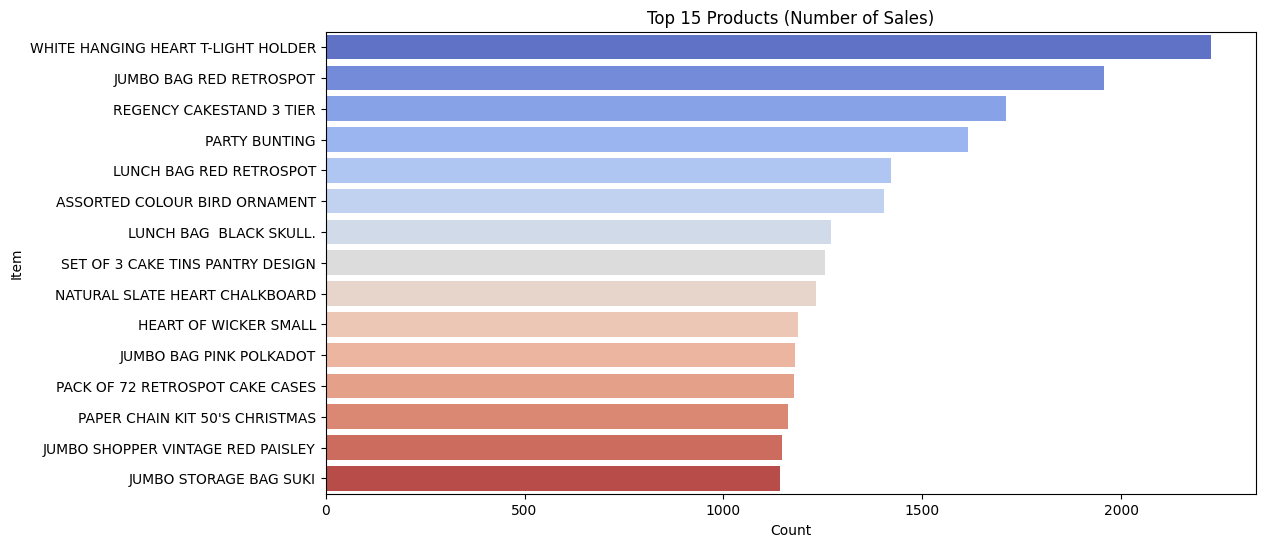

In [20]:
#top-selling products
plt.figure(figsize=(12, 6))
top_items = data['ItemDescription'].value_counts().head(15)
sns.barplot(y=top_items.index, x=top_items.values, palette='coolwarm')
plt.title('Top 15 Products (Number of Sales)')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

<ipython-input-21-edace2cb5c53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_items.index, x=top_items.values, palette='coolwarm')


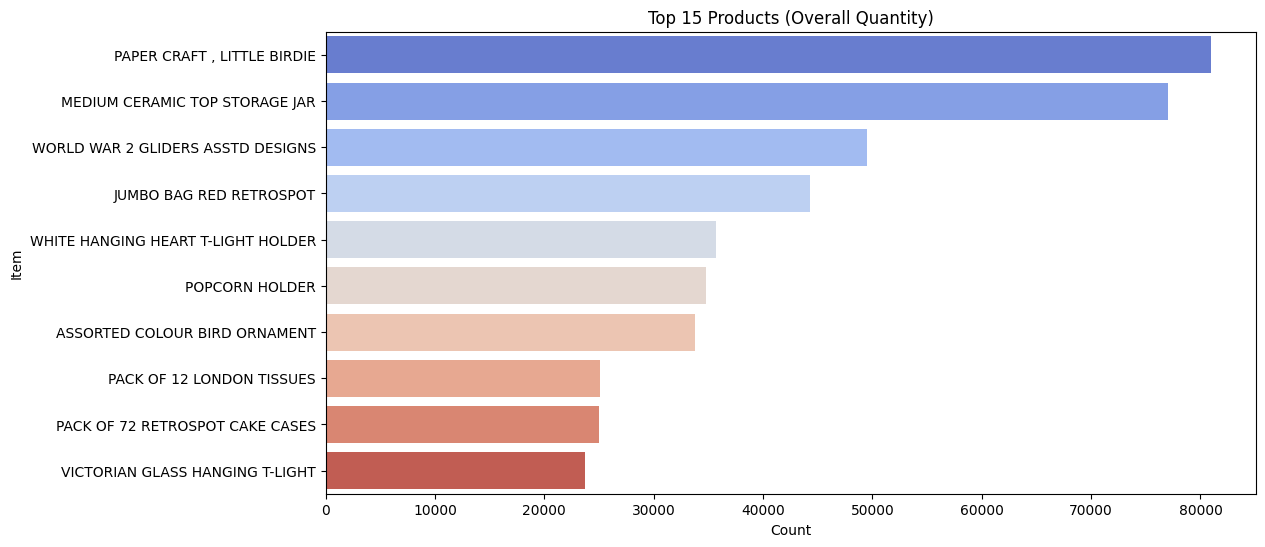

In [21]:
plt.figure(figsize=(12, 6))
top_items = data.groupby('ItemDescription')['Quantity'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=top_items.index, x=top_items.values, palette='coolwarm')
plt.title('Top 15 Products (Overall Quantity)')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

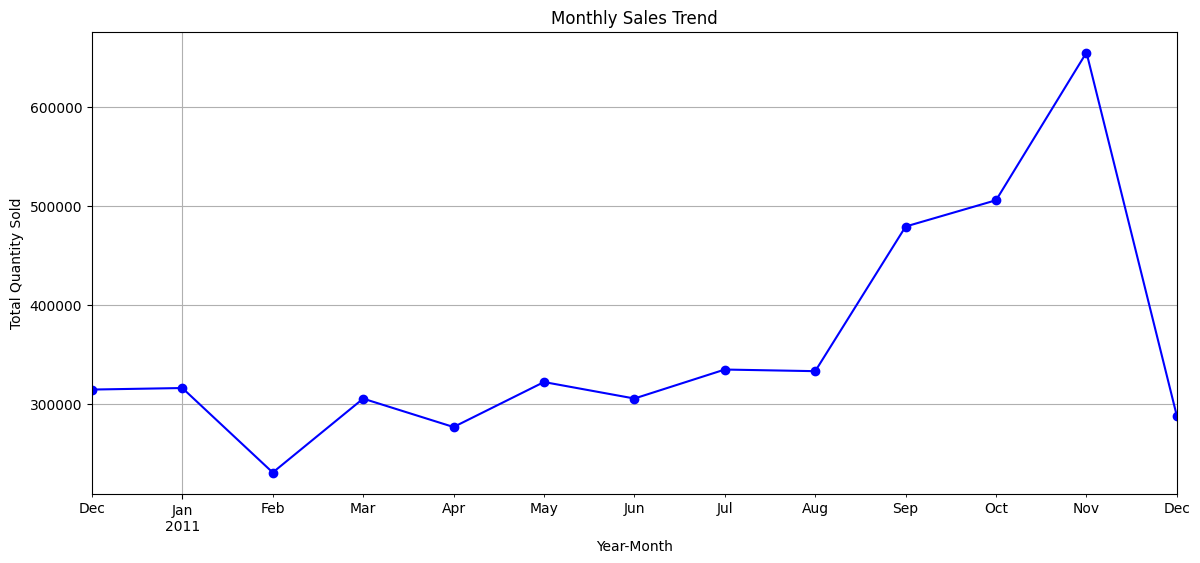

In [22]:
#Time Series Analysis of Sales Trend
data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('YearMonth')['Quantity'].sum()
plt.figure(figsize=(14, 6))
monthly_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

In [23]:
# Create a pivot table for product sales per month
product_sales_pivot = data.pivot_table(index='YearMonth', columns='ItemDescription', values='Quantity', aggfunc='sum', fill_value=0)

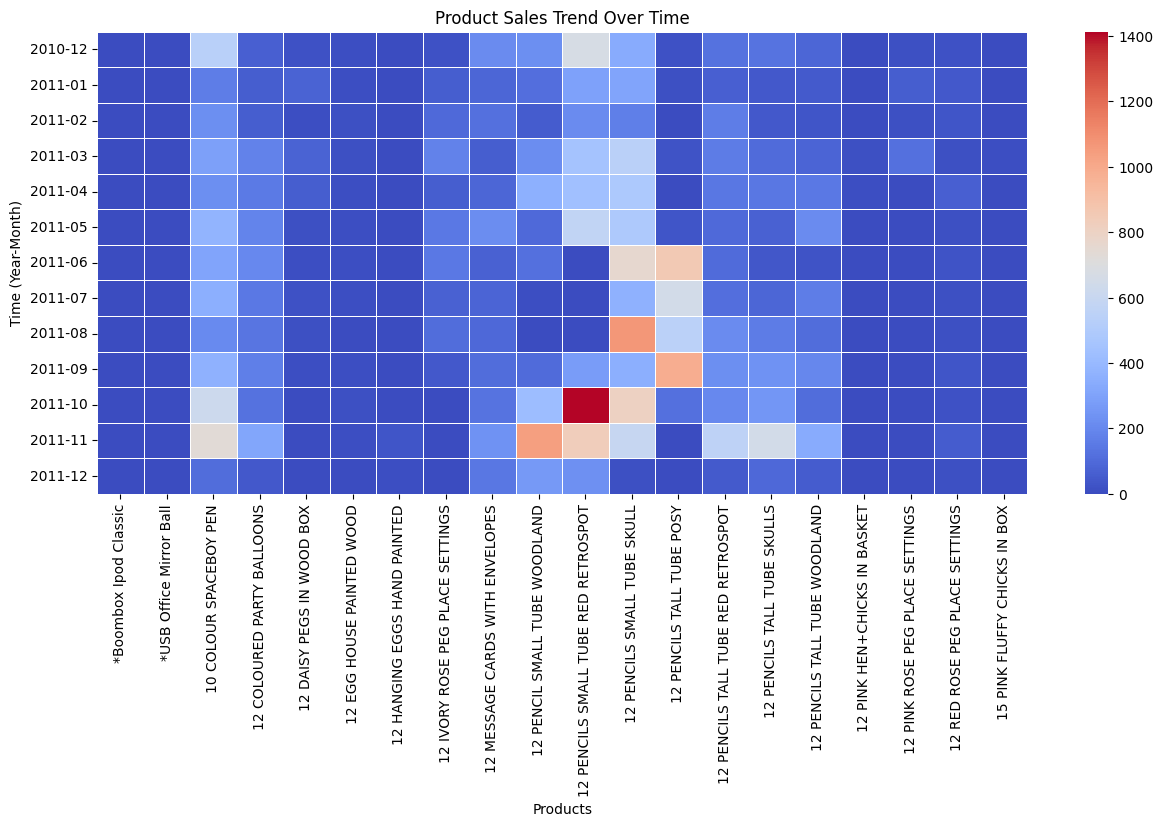

In [24]:
# Plot heatmap of top-selling products over time
plt.figure(figsize=(15, 6))
sns.heatmap(product_sales_pivot.iloc[:, :20], cmap='coolwarm', linewidths=0.5)  # Limiting to first 20 products for clarity
plt.title('Product Sales Trend Over Time')
plt.xlabel('Products')
plt.ylabel('Time (Year-Month)')
plt.xticks(rotation=90)
plt.show()

### **Feature Engineering**

In [25]:
#total revenue per transaction
data['TotalRevenue'] = data['Quantity'] * data['Price']

In [26]:
#total quantity per invoice
data['TransactionSize'] = data.groupby('InvoiceNo')['Quantity'].transform('sum')

In [69]:
#creating a dictionary of ItemDescription & Price to help develop Upselling Recommendations
price_df = data[['ItemDescription', 'Price']].set_index('ItemDescription')

In [70]:
price_df.drop_duplicates()
price_df

,Price
ItemDescription,
WHITE HANGING HEART T-LIGHT HOLDER,2.55
WHITE METAL LANTERN,3.39
CREAM CUPID HEARTS COAT HANGER,2.75
KNITTED UNION FLAG HOT WATER BOTTLE,3.39
RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...
FAIRY TALE COTTAGE NIGHT LIGHT,1.95
LARGE CAKE STAND HANGING STRAWBERY,2.95
SET OF 3 HANGING OWLS OLLIE BEAK,1.25


In [74]:
price_dict = price_df.to_dict()['Price']

In [75]:
price_dict

{'WHITE HANGING HEART T-LIGHT HOLDER': 2.95,
 'WHITE METAL LANTERN': 3.75,
 'CREAM CUPID HEARTS COAT HANGER': 4.15,
 'KNITTED UNION FLAG HOT WATER BOTTLE': 4.25,
 'RED WOOLLY HOTTIE WHITE HEART.': 8.29,
 'SET 7 BABUSHKA NESTING BOXES': 3.95,
 'GLASS STAR FROSTED T-LIGHT HOLDER': 4.95,
 'HAND WARMER UNION JACK': 2.1,
 'HAND WARMER RED POLKA DOT': 2.1,
 'ASSORTED COLOUR BIRD ORNAMENT': 1.69,
 "POPPY'S PLAYHOUSE BEDROOM": 4.13,
 "POPPY'S PLAYHOUSE KITCHEN": 4.13,
 'FELTCRAFT PRINCESS CHARLOTTE DOLL': 7.46,
 'IVORY KNITTED MUG COSY': 1.65,
 'BOX OF 6 ASSORTED COLOUR TEASPOONS': 8.29,
 'BOX OF VINTAGE JIGSAW BLOCKS': 5.95,
 'BOX OF VINTAGE ALPHABET BLOCKS': 20.79,
 'HOME BUILDING BLOCK WORD': 11.63,
 'LOVE BUILDING BLOCK WORD': 6.25,
 'RECIPE BOX WITH METAL HEART': 7.95,
 'DOORMAT NEW ENGLAND': 8.25,
 'JAM MAKING SET WITH JARS': 8.29,
 'RED COAT RACK PARIS FASHION': 10.79,
 'YELLOW COAT RACK PARIS FASHION': 4.95,
 'BLUE COAT RACK PARIS FASHION': 10.79,
 'BATH BUILDING BLOCK WORD': 5.45,
 "P

### **Market Basket Analysis - Apriori**

In [27]:
#creating a pivot table for Market Basket Analysis
basket = data.pivot_table(index='InvoiceNo', columns='ItemDescription', values='Quantity', aggfunc='sum', fill_value=0)
basket = (basket > 0).astype(int)

In [28]:
basket

ItemDescription,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [30]:
#defining first set of Association Rules which focus on strong, non-random associations
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [31]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.051615,0.048618,0.031247,0.605376,12.451679,1.0,0.028737,2.410859,0.969743,0.452936,0.585210,0.624035
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048618,0.051615,0.031247,0.642694,12.451679,1.0,0.028737,2.654266,0.966688,0.452936,0.623248,0.624035
2,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041625,0.049839,0.030026,0.721333,14.473256,1.0,0.027951,3.409668,0.971339,0.488708,0.706716,0.661892
3,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.049839,0.041625,0.030026,0.602450,14.473256,1.0,0.027951,2.410702,0.979736,0.488708,0.585183,0.661892
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038961,0.051726,0.031968,0.820513,15.862661,1.0,0.029953,5.283241,0.974944,0.544423,0.810722,0.719269
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051726,0.038961,0.031968,0.618026,15.862661,1.0,0.029953,2.515978,0.988068,0.544423,0.602540,0.719269
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053058,0.051726,0.038850,0.732218,14.155683,1.0,0.036106,3.541211,0.981430,0.589226,0.717611,0.741645
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051726,0.053058,0.038850,0.751073,14.155683,1.0,0.036106,3.804094,0.980051,0.589226,0.737125,0.741645
8,(JUMBO BAG RED RETROSPOT),(JUMBO BAG BAROQUE BLACK WHITE),0.107393,0.050505,0.031635,0.294574,5.832558,1.0,0.026211,1.345987,0.928234,0.250549,0.257051,0.460474
9,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050505,0.107393,0.031635,0.626374,5.832558,1.0,0.026211,2.389037,0.872620,0.250549,0.581421,0.460474


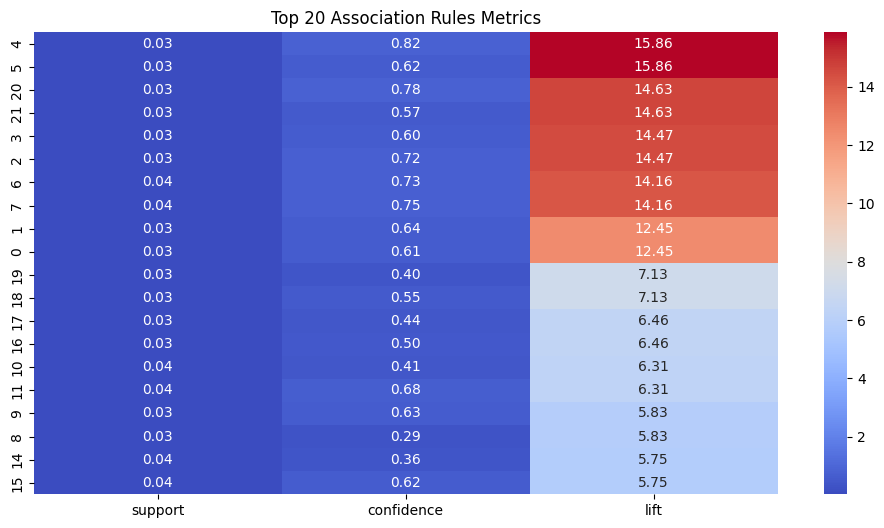

In [32]:
# Heatmap of top rules
plt.figure(figsize=(12, 6))
top_rules = rules.sort_values(by='lift', ascending=False).head(20)
sns.heatmap(top_rules[['support', 'confidence', 'lift']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 20 Association Rules Metrics')
plt.show()

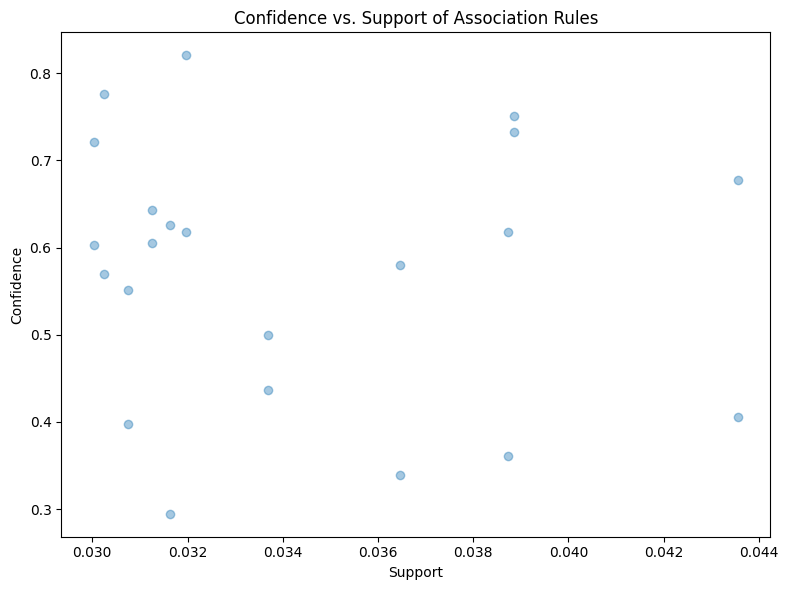

In [33]:
#scatter plot of confidence vs. Support to check for patterns, if any. None significant in this case.
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

In [34]:
#defining second set of Association Rules which focus on frequently occuring itemsets
rules2 = association_rules(frequent_itemsets, metric="confidence", min_threshold = 0.5)

In [35]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.051615,0.048618,0.031247,0.605376,12.451679,1.0,0.028737,2.410859,0.969743,0.452936,0.585210,0.624035
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048618,0.051615,0.031247,0.642694,12.451679,1.0,0.028737,2.654266,0.966688,0.452936,0.623248,0.624035
2,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041625,0.049839,0.030026,0.721333,14.473256,1.0,0.027951,3.409668,0.971339,0.488708,0.706716,0.661892
3,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.049839,0.041625,0.030026,0.602450,14.473256,1.0,0.027951,2.410702,0.979736,0.488708,0.585183,0.661892
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038961,0.051726,0.031968,0.820513,15.862661,1.0,0.029953,5.283241,0.974944,0.544423,0.810722,0.719269
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051726,0.038961,0.031968,0.618026,15.862661,1.0,0.029953,2.515978,0.988068,0.544423,0.602540,0.719269
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053058,0.051726,0.038850,0.732218,14.155683,1.0,0.036106,3.541211,0.981430,0.589226,0.717611,0.741645
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051726,0.053058,0.038850,0.751073,14.155683,1.0,0.036106,3.804094,0.980051,0.589226,0.737125,0.741645
8,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050505,0.107393,0.031635,0.626374,5.832558,1.0,0.026211,2.389037,0.872620,0.250549,0.581421,0.460474
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064325,0.107393,0.043568,0.677308,6.306840,1.0,0.036660,2.766128,0.899288,0.339974,0.638484,0.541496


### **Cross Selling & Up Selling Recommendations**

In [80]:
#sorting rules by highest lift to choose the ones with strongest associations
#as well as by highest support to choose the associations with the maximum probability of occurence

recommendations_df = rules.sort_values(by=['lift', 'support'], ascending=False).reset_index()
recommendations_df.drop(columns='index', inplace=True)

recommendations_df.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038961,0.051726,0.031968,0.820513,15.862661,1.0,0.029953,5.283241,0.974944,0.544423,0.810722,0.719269
1,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051726,0.038961,0.031968,0.618026,15.862661,1.0,0.029953,2.515978,0.988068,0.544423,0.602540,0.719269
2,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.038961,0.053058,0.030248,0.776353,14.632148,1.0,0.028180,4.234097,0.969427,0.489668,0.763822,0.673218
3,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.053058,0.038961,0.030248,0.570084,14.632148,1.0,0.028180,2.235409,0.983859,0.489668,0.552655,0.673218
4,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041625,0.049839,0.030026,0.721333,14.473256,1.0,0.027951,3.409668,0.971339,0.488708,0.706716,0.661892


In [81]:
print("CROSS SELLING RECOMMENDATIONS: TOP 5")
for i in range(5):
  print(f"Customers who bought {list(recommendations_df.iloc[i,0])[0]} also bought  {list(recommendations_df.iloc[i,1])[0]}")

CROSS SELLING RECOMMENDATIONS: TOP 5
Customers who bought PINK REGENCY TEACUP AND SAUCER also bought  GREEN REGENCY TEACUP AND SAUCER
Customers who bought GREEN REGENCY TEACUP AND SAUCER also bought  PINK REGENCY TEACUP AND SAUCER
Customers who bought PINK REGENCY TEACUP AND SAUCER also bought  ROSES REGENCY TEACUP AND SAUCER
Customers who bought ROSES REGENCY TEACUP AND SAUCER also bought  PINK REGENCY TEACUP AND SAUCER
Customers who bought GARDENERS KNEELING PAD CUP OF TEA also bought  GARDENERS KNEELING PAD KEEP CALM


In [82]:
print("TOP UP SELLING RECOMMENDATIONS:")
for i in range(len(rules2)):
  if price_dict[list(recommendations_df.iloc[i,0])[0]] < price_dict[list(recommendations_df.iloc[i,1])[0]]:
    print(f"For customers who bought {list(recommendations_df.iloc[i,0])[0]}, recommend {list(recommendations_df.iloc[i,1])[0]}")
  else:
    continue

TOP UP SELLING RECOMMENDATIONS:
For customers who bought PINK REGENCY TEACUP AND SAUCER, recommend GREEN REGENCY TEACUP AND SAUCER
For customers who bought PINK REGENCY TEACUP AND SAUCER, recommend ROSES REGENCY TEACUP AND SAUCER
For customers who bought GARDENERS KNEELING PAD KEEP CALM, recommend GARDENERS KNEELING PAD CUP OF TEA
For customers who bought LUNCH BAG RED RETROSPOT, recommend LUNCH BAG PINK POLKADOT
For customers who bought LUNCH BAG RED RETROSPOT, recommend LUNCH BAG  BLACK SKULL.
